In [1]:
####Import Packages


In [2]:
import tensorflow as tf
import keras

from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import preprocess_input

import matplotlib.pyplot as plt
import pandas as pd

import PIL
from PIL import Image

import os
os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

print(tf.__version__)
print(keras.__version__)

import multiprocessing

# Define the number of workers to use while training/testing
num_workers = multiprocessing.cpu_count()
print(num_workers)

2.12.0
2.12.0
24


In [ ]:
# setting variables and directories for training and testing paths

In [22]:
img_size = 200
batch_size = 64
epochs = 5
train_path = 'C:/Users/devun/Desktop/ASL_data/asl_alphabet_train/asl_alphabet_train/'
test_path = 'C:/Users/devun/Desktop/ASL_data/asl_alphabet_test/asl_alphabet_test/'

In [24]:
#### define image data generators for data augmentation and rescaling

In [25]:
augment_train_data = ImageDataGenerator(preprocessing_function=preprocess_input,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)
augment_test_data = ImageDataGenerator(preprocessing_function=preprocess_input,
    validation_split=0.2, rescale=1./255)

In [26]:
###Test set setup


In [27]:
test_datagen=ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [28]:
####Augmenting and rescaling datasets

In [29]:
####run image data generators on training and testing dataset

In [30]:
training_set = augment_train_data.flow_from_directory(train_path,
     shuffle=True,
     classes=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K',
     'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z','del', 'space', 'nothing'],
     target_size=(img_size, img_size),
     batch_size=batch_size,
     color_mode='grayscale')

Found 45000 images belonging to 29 classes.


In [31]:
###Augmenting test set

In [32]:
test_set = augment_train_data.flow_from_directory(test_path,
     classes=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K',
     'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z','del', 'space', 'nothing'],
     target_size=(img_size, img_size),
     batch_size=batch_size,
     color_mode='grayscale')

Found 700 images belonging to 29 classes.


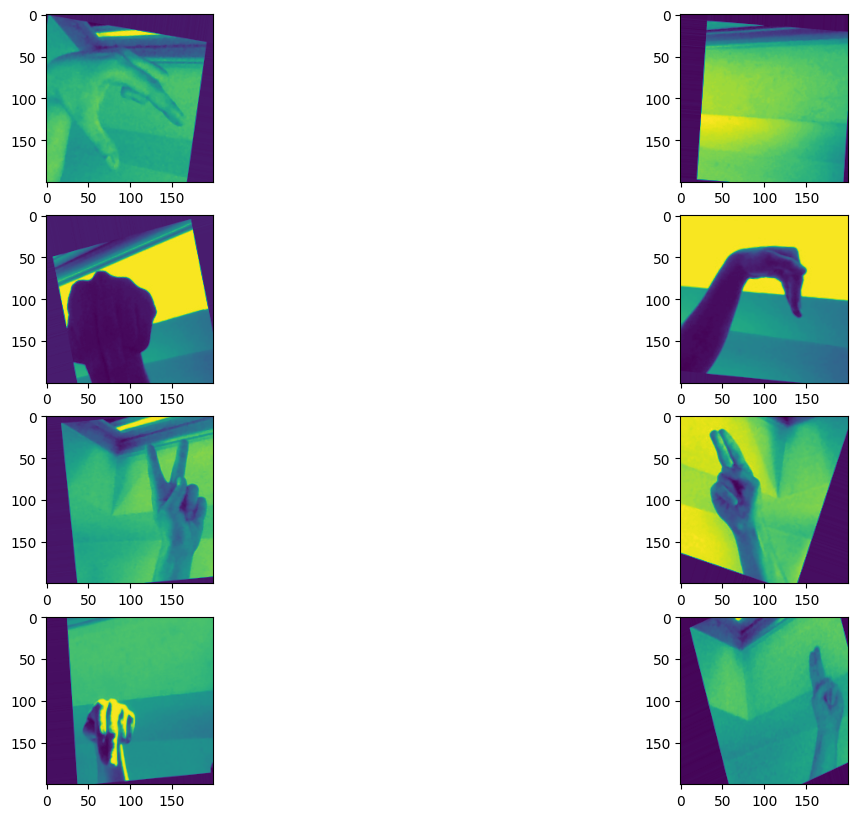

In [33]:
# showing 8 images from training dataset
fig = plt.figure(figsize=(15, 10))
for i in range(1,9):
    plt.subplot(4,2,i)
    plt.imshow(training_set[0][0][i-1])
plt.show()

In [34]:
####Creating the model

In [35]:
model = Sequential()
model.add(Conv2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (200,200,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 29 , activation = 'softmax'))

In [41]:
####Compile the model

In [36]:
model.compile(optimizer = Adam(learning_rate=0.001), 
                   loss = 'categorical_crossentropy', 
                   metrics = ['accuracy'])

In [38]:
##Print summary of the layer

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 200, 200, 75)      750       
                                                                 
 batch_normalization_3 (Batc  (None, 200, 200, 75)     300       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 100, 100, 75)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 100, 100, 50)      33800     
                                                                 
 dropout_2 (Dropout)         (None, 100, 100, 50)      0         
                                                                 
 batch_normalization_4 (Batc  (None, 100, 100, 50)    

In [40]:
# Define the early stopping callback
early_stopping = EarlyStopping(monitor='accuracy', patience=5, mode='max', verbose=1)
##Train the model and test accuracy, loss
history=model.fit(training_set,
                  epochs=8,
                 validation_data=test_set,
                  #callbacks=[early_stopping], #, learn_rate_schedule
                  workers=num_workers)


Epoch 1/8
704/704 [==============================] - 4515s 6s/step - loss: 2.9949 - accuracy: 0.1374 - val_loss: 2.9396 - val_accuracy: 0.1929
Epoch 2/8
704/704 [==============================] - 4377s 6s/step - loss: 2.3950 - accuracy: 0.2546 - val_loss: 3.2025 - val_accuracy: 0.2757
Epoch 3/8
704/704 [==============================] - 4318s 6s/step - loss: 2.1211 - accuracy: 0.3226 - val_loss: 2.1348 - val_accuracy: 0.3757
Epoch 4/8
704/704 [==============================] - 4300s 6s/step - loss: 1.9407 - accuracy: 0.3714 - val_loss: 1.2396 - val_accuracy: 0.5643
Epoch 5/8
704/704 [==============================] - 4354s 6s/step - loss: 1.7656 - accuracy: 0.4157 - val_loss: 1.5950 - val_accuracy: 0.4857
Epoch 6/8
704/704 [==============================] - 4301s 6s/step - loss: 1.6514 - accuracy: 0.4493 - val_loss: 1.2526 - val_accuracy: 0.5857
Epoch 7/8
704/704 [==============================] - 4294s 6s/step - loss: 1.5436 - accuracy: 0.4825 - val_loss: 1.2208 - val_accuracy: 0.5886

In [ ]:
####Running additional training on model

In [ ]:
additional_epochs = 7  # Number of additional epochs to train for

history = model.fit(training_set,
                      epochs=fin_model.epoch + additional_epochs,  # Set the total number of epochs
                      validation_data=test_set,
                      workers=num_workers)

In [ ]:
####Save the model

In [ ]:
model_json = model.to_json()
with open("model_new.json", "w") as json_file:
    json_file.write(model_json)
print("model saved successfully")
model.save_weights('model_new.h5')
print("weights saved successfully")

In [ ]:
#### Plot the training and validation accuracy over epochs

In [43]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

NameError: name 'History' is not defined